## Introduction

Kickstarter is a funding platform directed toward helping creative projects get off the ground. It's entirely driven by crowdfunding, so donations from the general public fuel these dynamic new ideas.

How does Kickstarter work?

Kickstarter is driven by creators and backers. Creators present creative project ideas, and backers fund them. Creators set up a page to display their project's details and prototypes using text, video, and photos. Project creators choose a deadline and a minimum funding goal and create reward levels for backers who pledge specific amounts. 
Once enough backers have funded the project, the creator can develop and produce their vision. If the goal is not met by the deadline, no funds are collected (all or nothing rule).

### About this project 

Purpose of this project is to try to make a model to predict if the project would be successful or failure.

Some interesting questions to answer along the analysis:
- How many backers are needed on average to have successful Kickstarter campaign?
- Are projects from certain countries more likely to be successful campaigns?
- Which categories of projects are more likely to attract more backers? 

### Dataset information 
- Source: https://www.kaggle.com/kemical/kickstarter-projects

- Content: dataset contains about 380,000 rows of data collected on crowdfunding projects hosted on Kickstarter.com. Columns are self explanatory.

- Acknowledgements: Kickstarter Platform

## Reading csv file into pandas dataframe and overview of the data

In [253]:
import pandas as pd

data=pd.read_csv('ks-projects-201801.csv')
data.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [254]:
data.shape

(378661, 15)

Let's investigate columns and data types of these columns.

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


## Data cleaning

In [256]:
data['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

Project's state labeled other than 'failed' or 'successful' will be droped. As 'state' column is our target variable, we want only project labeled as 'failed' or 'successful'. 

We could also separate projects labeled with 'live' and try to predict their outcome.

In [257]:
data=data[data['state'].isin(['failed', 'successful'])]

In [258]:
data['state'].value_counts()

failed        197719
successful    133956
Name: state, dtype: int64

Next, checking for null values in dataframe.

In [259]:
data.isnull().sum()

ID                    0
name                  3
category              0
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged         210
usd_pledged_real      0
usd_goal_real         0
dtype: int64

There are 3 null values in 'name' column. We will just drop three rows containing this values. Also, column 'usd_pledged' contains 210 null values. Considering our dataframe consists of aproximately 380,000 rows it won't affect our data much if we drop these 210 rows also.

In [260]:
data=data.dropna()

In [261]:
data.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

Our dataframe doesn't have null values anymore.

## Data exploration and feature engineering

In this section we will do some exploratory data analysis on features. We will also create new features where neccesary. 

At the end of this section we will have clean data and will be ready to prepare prediction models.

### Target variable - 'state'

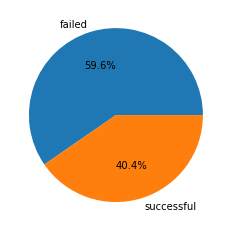

In [262]:
# Show pie chart of 'successful' and 'failed' projects to see percentages
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(x=data['state'].value_counts(), labels=data['state'].value_counts().index, autopct='%1.1f%%')
plt.show()

As we can see from the pie chart above, almost 60% of projects fail to reach their goal. If 'canceled' and 'suspended' project would be added to 'failed' group of projects, the percentage would be even higher.

Next, we will make new feature which will have 1's for 'successful' projects and 0's for 'failed' projects. We have to do this because 'state' column is categorical variable

In [263]:
#Create dummy variables from 'state' column
data=pd.get_dummies(data, columns=['state'])
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'state_failed',
       'state_successful'],
      dtype='object')

We can drop 'state_failed' columns because all the data we need is contained in 'state_successful' column. 

Also, we will rename 'state_successful' column to 'successful'.

In [264]:
#drop 'state_failed' columns
data=data.drop(labels='state_failed', axis=1)
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'state_successful'],
      dtype='object')

In [265]:
#rename 'state_successful' to 'successful' and 'usd pledged' to 'usd_pledged'  
success_rename={'usd pledged':'usd_pledged','state_successful':'successful'}
data.rename(mapper=success_rename, axis=1, inplace=True)
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'backers', 'country', 'usd_pledged',
       'usd_pledged_real', 'usd_goal_real', 'successful'],
      dtype='object')

Our target variable is now named 'successful'.

### 'category' and 'main category' features

In [266]:
unique_categories=data['category'].unique()
len(unique_categories)

159

In [267]:
data['main_category'].value_counts()

Film & Video    56503
Music           45801
Publishing      35413
Games           28520
Technology      27046
Art             25640
Design          25363
Food            22054
Fashion         19774
Theater         10242
Comics           9878
Photography      9689
Crafts           7818
Journalism       4148
Dance            3573
Name: main_category, dtype: int64

<AxesSubplot:xlabel='main_category'>

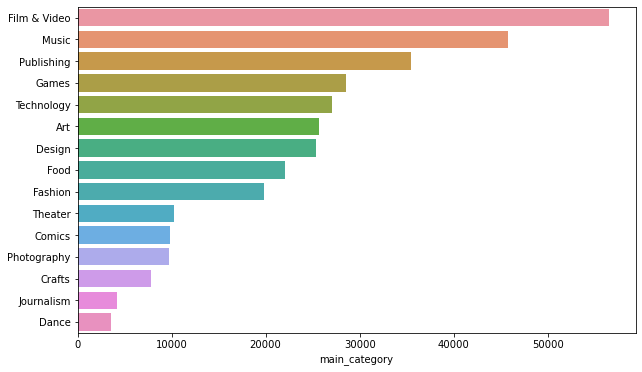

In [268]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=data['main_category'].value_counts(), y=data['main_category'].value_counts().index)

It would be interesting to see percentages of successful projects by main categories.

In [269]:
# value counts of main categories as dataframe
all_grouped=data['main_category'].value_counts().reset_index()

all_grouped=all_grouped.sort_values('index')

# rename column to 'total'
rename_category={'main_category':'total'}

all_grouped.rename(mapper=rename_category, axis=1, inplace=True)

In [270]:
# only successful projects grouped by categories (returned as dataframe)

only_success=data['main_category'][data['successful']==1].value_counts().reset_index()

# sort by categories
rename_success={'main_category':'successful'}
only_success=only_success.sort_values('index').rename(mapper=rename_success, axis=1)

In [271]:
# merge all_grouped and only_success dataframes
projects_success_rate=all_grouped.merge(only_success, on='index')

In [272]:
# add new column which shows success ratio of projects by categories
projects_success_rate['success_ratio']=projects_success_rate['successful']/projects_success_rate['total']

projects_success_rate.sort_values('success_ratio', ascending=False)

,index,total,successful,success_ratio
3,Dance,3573,2338,0.654352
14,Theater,10242,6534,0.637961
1,Comics,9878,5842,0.591415
10,Music,45801,24105,0.526299
0,Art,25640,11510,0.448908
8,Games,28520,12518,0.438920
6,Film & Video,56503,23612,0.417889
4,Design,25363,10549,0.415921
12,Publishing,35413,12300,0.347330
11,Photography,9689,3305,0.341108


It looks like best chances of project being successful and being funded have projects in dance, theater, comics and music categories. Notice that all this categories have one thing in common, they all could fall under one big umbrella called 'entertainment'.

Least chances of project being funded have projects in technology and journalism.

### 'country' and 'currency' features

In [273]:
countries=data['country'].value_counts()
countries

US    261358
GB     29453
CA     12370
AU      6616
DE      3436
FR      2520
NL      2411
IT      2369
ES      1873
SE      1509
MX      1411
NZ      1274
DK       926
IE       683
CH       652
NO       582
BE       523
AT       485
HK       477
SG       454
LU        57
JP        23
Name: country, dtype: int64

As expected, the most projects are located in the US, in fact, US has more projects than rest of the countries combined. Let's see what is success rate of projects by different countries.

In [274]:
crosst = pd.crosstab(data['country'],data['successful'])
crosst['success ratio'] = crosst[1]/crosst.sum(axis=1)
crosst.sort_values(by=['success ratio'],inplace=True,ascending=False)
crosst

successful,0,1,success ratio
country,,,
HK,261,216,0.452830
US,152059,109299,0.418196
GB,17386,12067,0.409704
SG,276,178,0.392070
DK,566,360,0.388769
FR,1612,908,0.360317
NZ,826,448,0.351648
SE,1000,509,0.337309
CA,8236,4134,0.334196


It look like projects from US have good chances of being successful. Top 5 countries by success ratio are HK (Hong Kong), US (United States), GB (Great Britan), SG (Singapore) and DK (Denmark).

Let's see if 'currency' column relates to 'country' column (value counts should return approximately equal counts).

In [275]:
currencies=data['currency'].value_counts()

currencies

USD    261358
GBP     29453
EUR     14357
CAD     12370
AUD      6616
SEK      1509
MXN      1411
NZD      1274
DKK       926
CHF       652
NOK       582
HKD       477
SGD       454
JPY        23
Name: currency, dtype: int64

We can see there are less currencies than countries in our dataframe. We can conclude that some countries are using same currency. This is the case with euro countries which are using their common currency EUR.

### 'backers' feature

In [276]:
data['backers'].describe()

count    331462.000000
mean        116.456315
std         965.732911
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7faabb106040>,
 'caps': [<matplotlib.lines.Line2D at 0x7faabb106700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faabb0f7ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faabb106dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faabb092160>],
 'means': []}

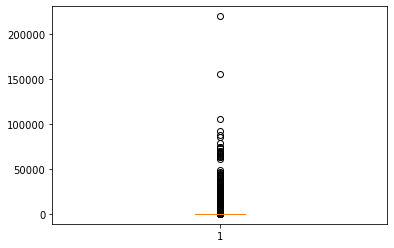

In [277]:
#visualize outliers with boxplot
plt.boxplot(data['backers'])

We will set our upper threshold and drop all values that are gretaer than that threshold (drop outliers).

In [278]:
#set max_threshold
max_threshold=data['backers'].quantile(0.9995)
max_threshold

12647.290499999595

In [279]:
#how many outliers do we have (values greater than max_threshold)
outliers=data[data.backers>max_threshold]
outliers.shape

(166, 15)

In [280]:
#remove outliers from dataset
data=data[data.backers<max_threshold]

#recalculate summary statistics
data['backers'].describe()

count    331296.000000
mean        102.062929
std         432.965752
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max       12626.000000
Name: backers, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7faabb0cfeb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faabb05e5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faabb0cfb50>],
 'medians': [<matplotlib.lines.Line2D at 0x7faabb05ec70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faabb05efd0>],
 'means': []}

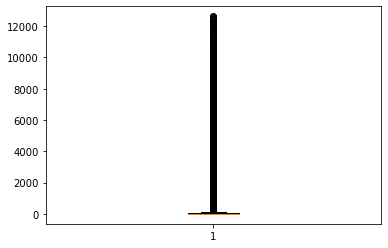

In [281]:
#boxplot after removing outliers
plt.boxplot(data['backers'])

### 'launched' and 'deadline' features

In [282]:
# inspect 'launched' column 
data['launched'].head(5)

0    2015-08-11 12:12:28
1    2017-09-02 04:43:57
2    2013-01-12 00:20:50
3    2012-03-17 03:24:11
5    2016-02-26 13:38:27
Name: launched, dtype: object

Data type object of 'launched' column is object which means our column isn't being recognized as a date. We will strip hours, minutes and seconds and convert data with pd.to_datetime() so it could be recognized as a date.

In [283]:
# strip hours, minutes and seconds
data['launched']=data['launched'].str[:10]

# convert 'launched' to datetime
data['launched'] = pd.to_datetime(data['launched'], format = '%Y-%m-%d')

In [284]:
data['launched'].sample(5)

111016   2017-04-07
137996   2016-08-08
139921   2013-04-19
97       2011-07-06
297404   2017-02-04
Name: launched, dtype: datetime64[ns]

In [285]:
# inspect 'deadline' column
data['deadline'].head(5)

0    2015-10-09
1    2017-11-01
2    2013-02-26
3    2012-04-16
5    2016-04-01
Name: deadline, dtype: object

In [287]:
# convert 'deadline' to datetime
data['deadline'] = pd.to_datetime(data['deadline'], format = '%Y-%m-%d')

In [289]:
data['deadline'].head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
5   2016-04-01
Name: deadline, dtype: datetime64[ns]

Now we have both 'launched' and 'deadline' in the right format. We can create new column called 'campaign_duration' which will be showing how many days campaign was active. It will be interesting to see if project which are active for longer period of time have better chances of being funded in compariosn with shorter projects.

In [292]:
# create new column 'campaign_duration' (in days)
data['campaign_duration']=(data['deadline']-data['launched']).apply(lambda x: x.days)

data['campaign_duration'].sample(10)

180790    15
293959    47
199684    27
188679    30
312679    30
288826    30
182744    26
256237    35
134822    15
291147    30
Name: campaign_duration, dtype: int64

In [294]:
# summary statistics for 'campaign_duration' column
data['campaign_duration'].describe()

count    331296.000000
mean         33.955870
std          12.715659
min           1.000000
25%          30.000000
50%          30.000000
75%          36.000000
max          92.000000
Name: campaign_duration, dtype: float64

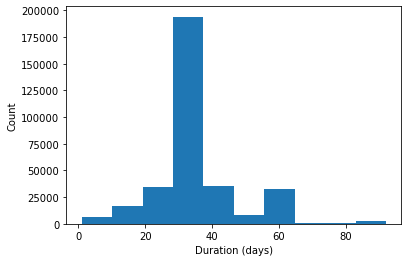

In [297]:
# histogram to observe 'campaign_duration' distribution
plt.hist(data['campaign_duration'])
plt.xlabel('Duration (days)')
plt.ylabel('Count')
plt.show()

"Projects on Kickstarter can last anywhere from 1 - 60 days. We've done some research, and found that projects lasting any longer are rarely successful. 

We recommend setting your campaign at 30 days or less. Campaigns with shorter durations have higher success rates, and create a helpful sense of urgency around your project."  - Kickstarter Support

We will not remove project over 60 day because maybe in some point of time in the past there was possible to campaign project for more than 60 days. Let's check how many data would we lose if we decided to remove project over 60 days.

In [300]:
data[data.campaign_duration>60].shape[0]

4824

### money features

Money features: 'goal','usd_goal_real', 'pledged', 'usd_pledged_real' and 'usd_pledged' 

Explanations of columns:
- usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter)

- usd_pledged_real: conversion in US dollars of the pledged column (conversion from Fixer.io API)

- usd_goal_real: conversion in US dollars of the goal column (conversion from Fixer.io API)

In [309]:
money_cols=['goal', 'usd_goal_real', 'pledged', 'usd_pledged', 'usd_pledged_real']

data[money_cols].describe()

,goal,usd_goal_real,pledged,usd_pledged,usd_pledged_real
count,3.312960e+05,3.312960e+05,3.312960e+05,3.312960e+05,3.312960e+05
mean,4.413240e+04,4.138356e+04,9.360904e+03,6.754318e+03,8.705996e+03
std,1.118489e+06,1.109492e+06,5.984349e+04,4.110835e+04,5.014222e+04
min,1.000000e-02,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+03,2.000000e+03,5.000000e+01,2.500000e+01,5.000000e+01
50%,5.000000e+03,5.000000e+03,7.800000e+02,5.010000e+02,7.853750e+02
75%,1.500000e+04,1.500000e+04,4.643497e+03,3.413000e+03,4.599000e+03
max,1.000000e+08,1.663614e+08,1.003530e+07,3.656618e+06,4.236618e+06
